# Data Project - Stock Market Analysis

## https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook
- 위 데이터를 클론 코딩을 통한 최신화 

## 필요한 라이브러리

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_datareader
# !pip install yfinance
# !pip install scikit-learn
# !pip install torch torchvision torchaudio 

## What was the change in price of the stock overtime?

In [2]:
import pandas as pd
import numpy as np
########################
import matplotlib.pyplot as plt
import seaborn as sns
########################
import yfinance as yf
from pandas_datareader import data as pdr
########################
from datetime import datetime

In [3]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
yf.pdr_override()

In [5]:
# 애플, 구글, MS, 아마존
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
# 시작 종료일자
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-28,172.440002,174.050003,172.270004,173.160004,173.160004,28180500,AMAZON
2024-02-29,173.009995,177.220001,172.850006,176.759995,176.759995,53805400,AMAZON
2024-03-01,176.750000,178.729996,176.070007,178.220001,178.220001,31956200,AMAZON
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON
2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900,AMAZON
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON


### Data info

In [9]:
df.info() # 전체 데이터의 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2023-03-13 to 2024-03-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1008 non-null   float64
 1   High          1008 non-null   float64
 2   Low           1008 non-null   float64
 3   Close         1008 non-null   float64
 4   Adj Close     1008 non-null   float64
 5   Volume        1008 non-null   int64  
 6   company_name  1008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.0+ KB


In [10]:
AAPL.info() # 애플 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-13 to 2024-03-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
GOOG.info() # 구글 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-13 to 2024-03-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [12]:
MSFT.info() # MS 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-13 to 2024-03-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
AMZN.info() # 아마존 정보

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-13 to 2024-03-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


### 기술통계

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,196.332956,198.243448,194.615908,196.558398,196.078579,4.041537e+07
std,89.980271,90.601273,89.264255,89.993929,89.510426,2.114614e+07
min,89.970001,93.080002,88.120003,91.660004,91.660004,8.828600e+06
25%,132.166248,133.592506,130.864998,132.300003,132.300003,2.237885e+07
50%,165.070000,166.385002,164.264999,165.595001,164.715813,3.853275e+07
75%,210.365002,214.192497,209.182499,212.062500,211.356388,5.263225e+07
max,420.559998,420.820007,415.089996,420.549988,419.773712,1.529387e+08


In [15]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,179.836072,181.326865,178.522539,180.043889,179.541789,5.752748e+07
std,10.807750,10.585551,10.708194,10.579570,10.700062,1.687355e+07
min,147.809998,153.139999,147.699997,150.470001,149.671112,2.404830e+07
25%,172.985001,174.052498,171.567505,173.172497,172.623596,4.678918e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048981,5.353515e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879902,6.428920e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [16]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,128.590592,130.062441,127.453234,128.818948,128.818948,2.386832e+07
std,13.473895,13.352277,13.407844,13.334969,13.334969,9.057194e+06
min,90.565002,93.080002,89.940002,91.660004,91.660004,8.828600e+06
25%,121.799997,123.432503,120.874998,122.442497,122.442497,1.816445e+07
50%,131.559998,133.215004,130.404999,131.809998,131.809998,2.150640e+07
75%,138.361504,139.671749,137.454998,138.619995,138.619995,2.650655e+07
max,154.009995,155.199997,152.919998,154.839996,154.839996,7.614030e+07


In [17]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,342.635357,345.740636,339.658849,342.929485,341.512308,2.606607e+07
std,38.883850,38.737753,38.684956,38.760328,39.371608,9.986010e+06
min,247.399994,257.910004,245.729996,253.919998,251.852966,1.017660e+07
25%,319.837502,322.544998,316.277489,319.860001,318.622910,2.050770e+07
50%,334.535004,337.449997,331.654999,334.430008,332.774506,2.359040e+07
75%,372.147507,374.609993,369.889999,373.330009,372.640915,2.789862e+07
max,420.559998,420.820007,415.089996,420.549988,419.773712,7.847820e+07


In [18]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,134.269802,135.843849,132.829008,134.441270,134.441270,5.419960e+07
std,20.853482,20.873985,20.827361,20.876429,20.876429,1.900369e+07
min,89.970001,94.019997,88.120003,92.430000,92.430000,2.237840e+07
25%,124.140003,126.532501,123.152502,124.602501,124.602501,4.279612e+07
50%,133.385002,134.275002,131.770004,133.180000,133.180000,4.990335e+07
75%,146.800003,147.867504,145.429996,147.029999,147.029999,6.009642e+07
max,177.529999,180.139999,177.490005,178.220001,178.220001,1.529387e+08


### 종가 데이터

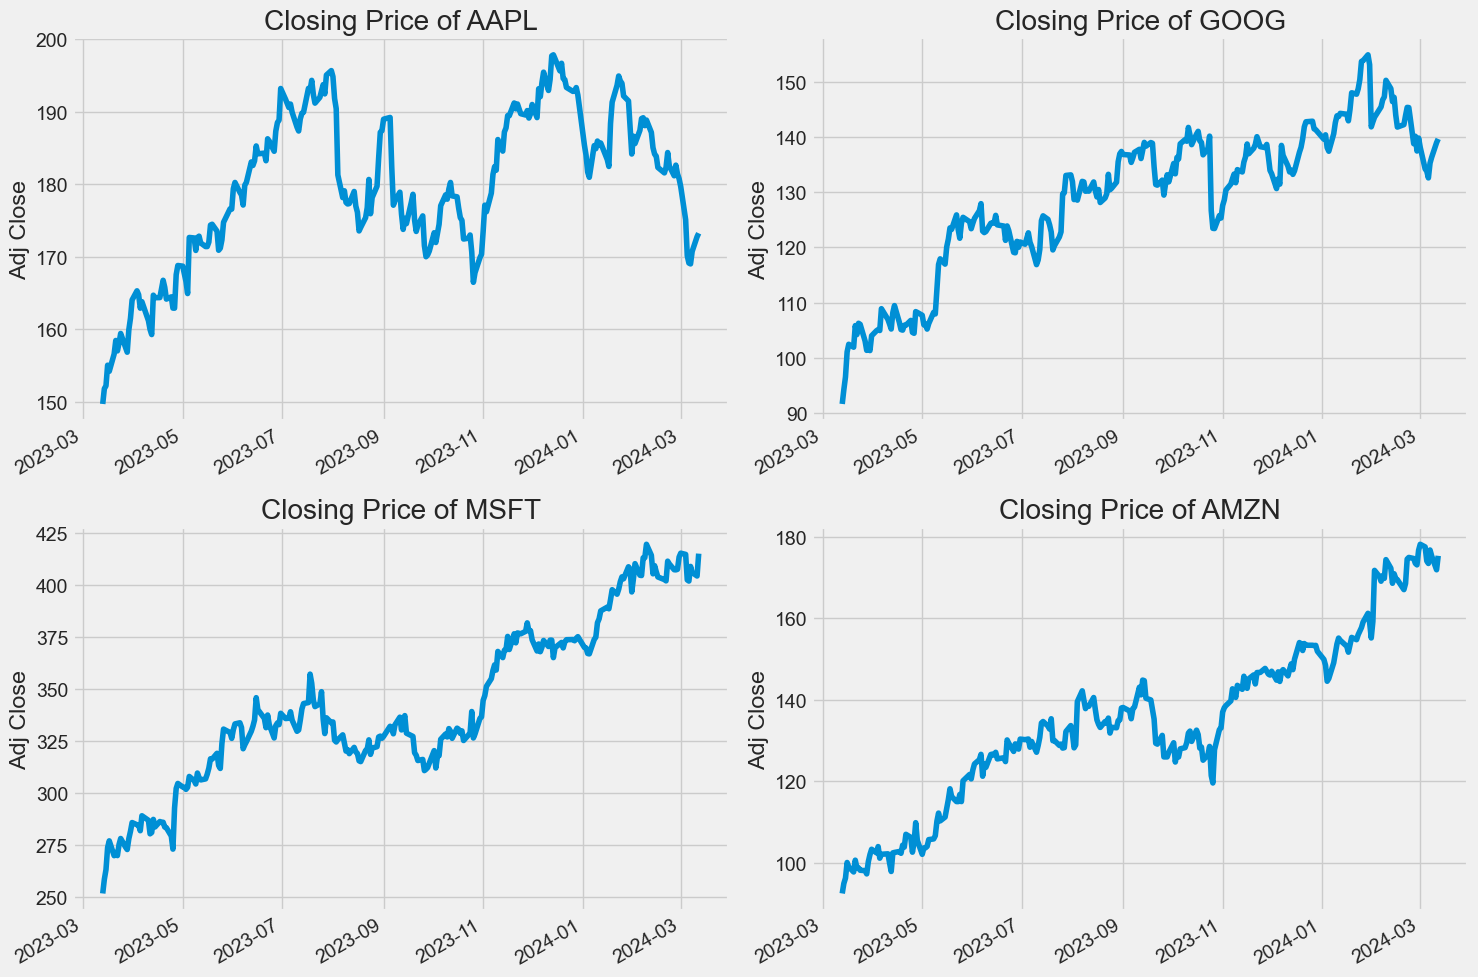

In [19]:
# 각 종목의 종가 차트
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i-1]}')

plt.tight_layout()

### 매출액

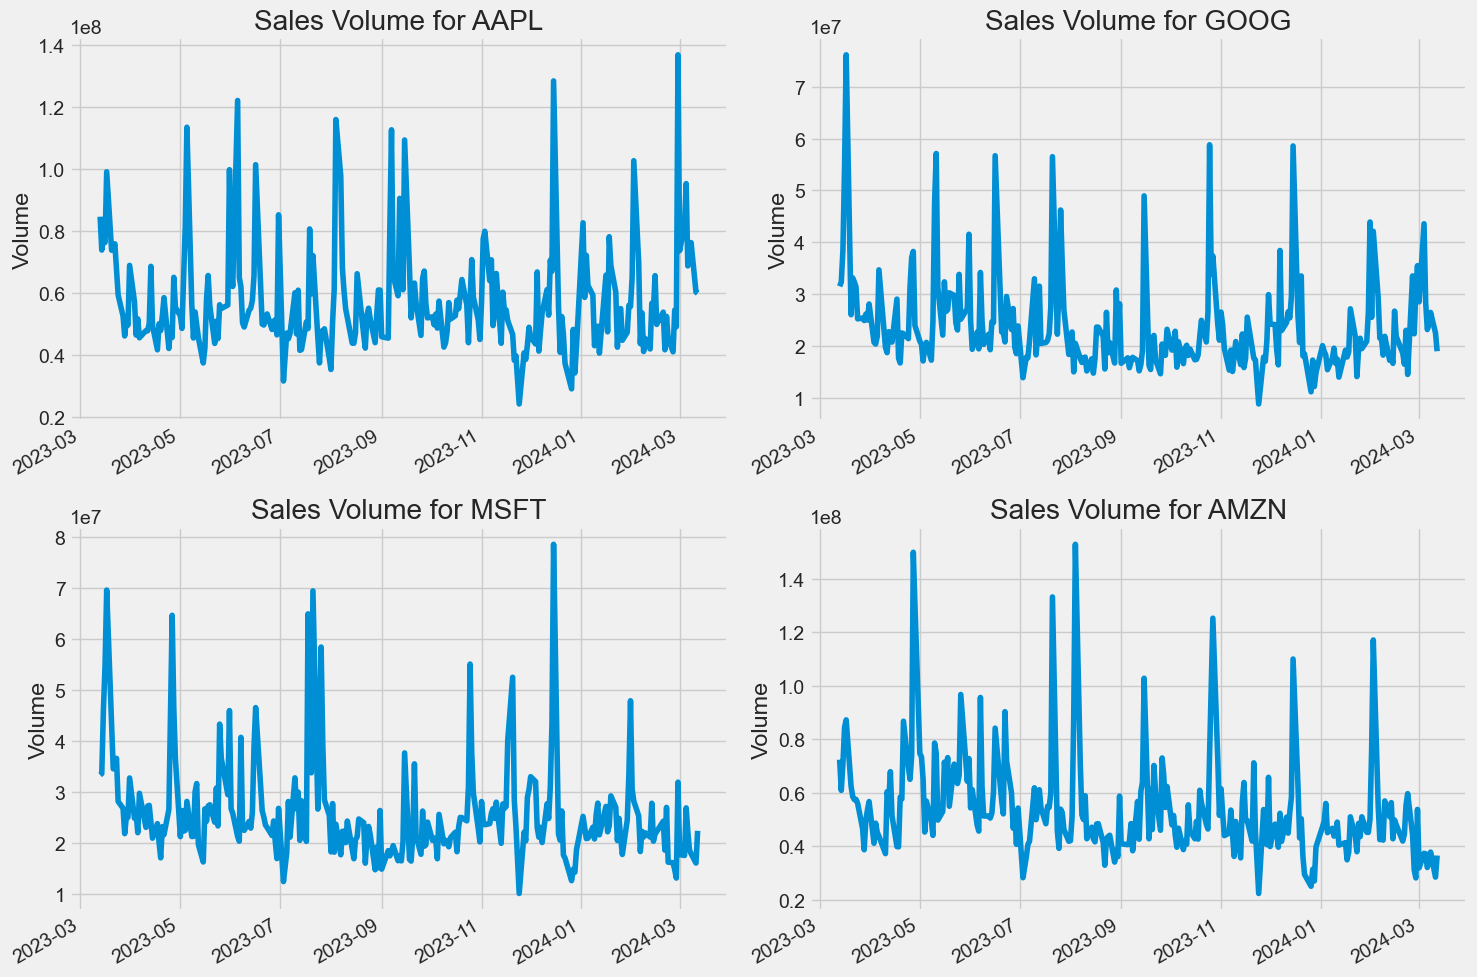

In [20]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Sales Volume for {tech_list[i-1]}')

plt.tight_layout()

## What was the moving average of the various stocks?

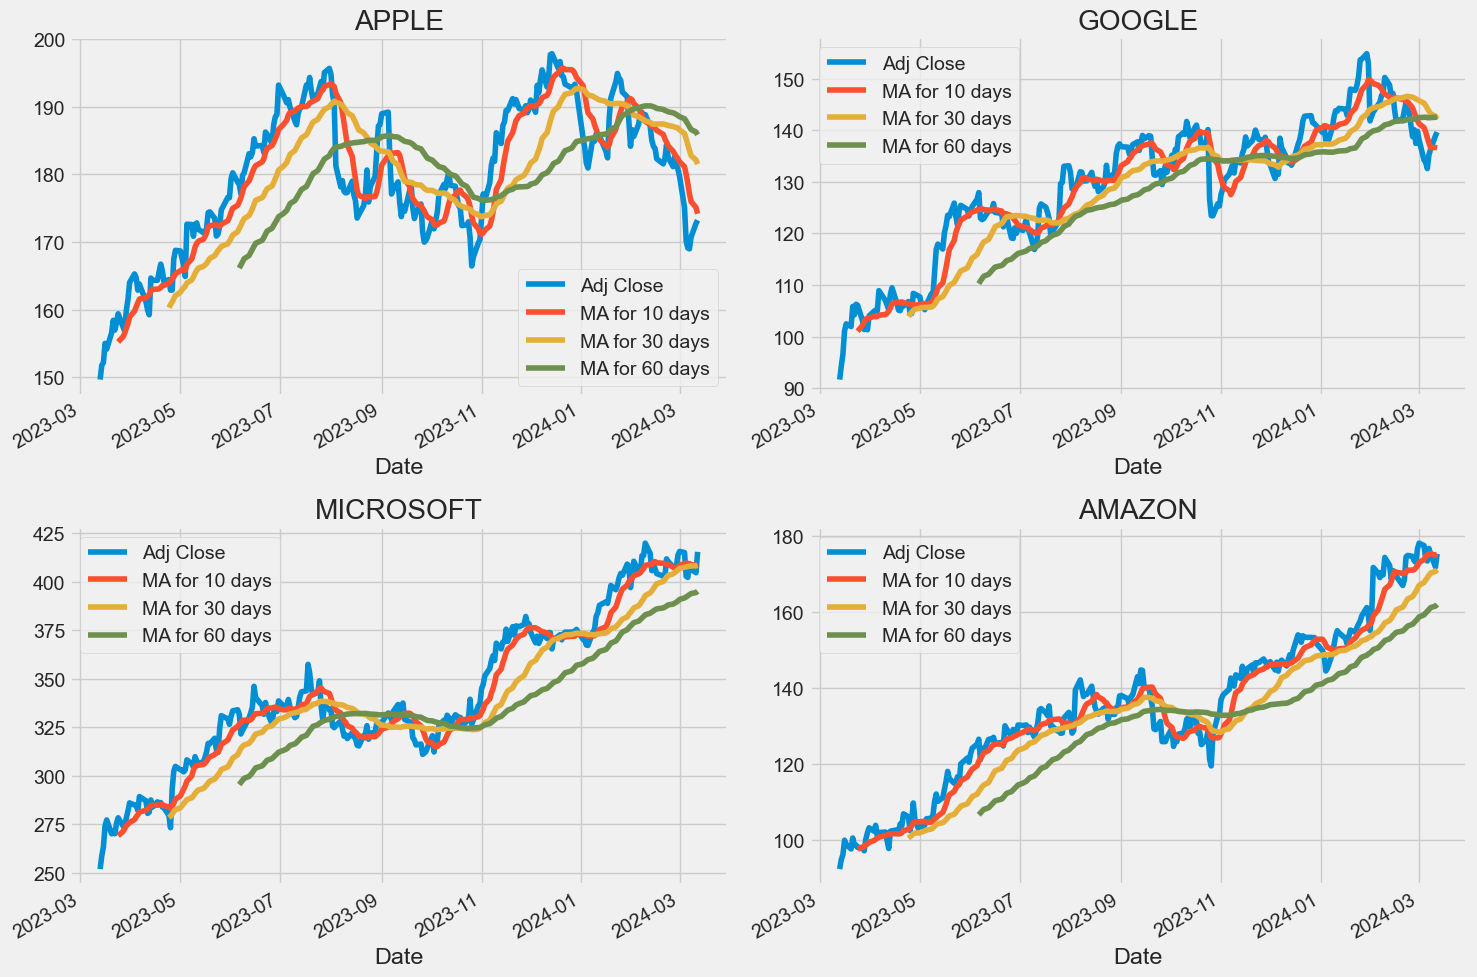

In [21]:
ma_day =[10,30,60] # 이동평균일 10일, 30일, 60일

for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## What was the daily return of the stock on average?

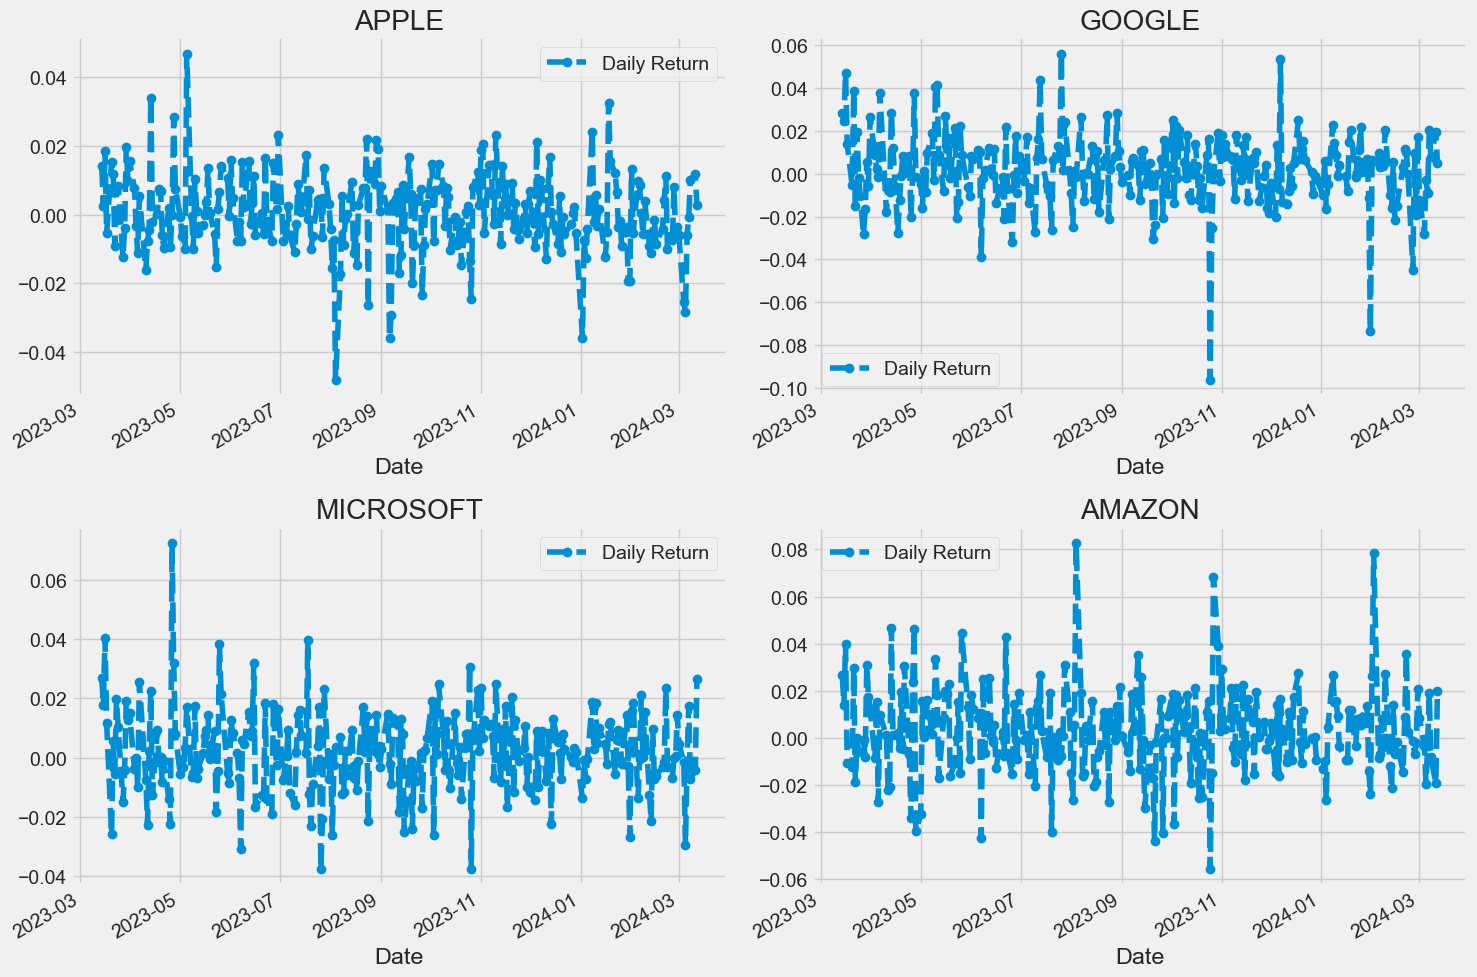

In [22]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True,linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
    
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True,linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
    
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True,linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

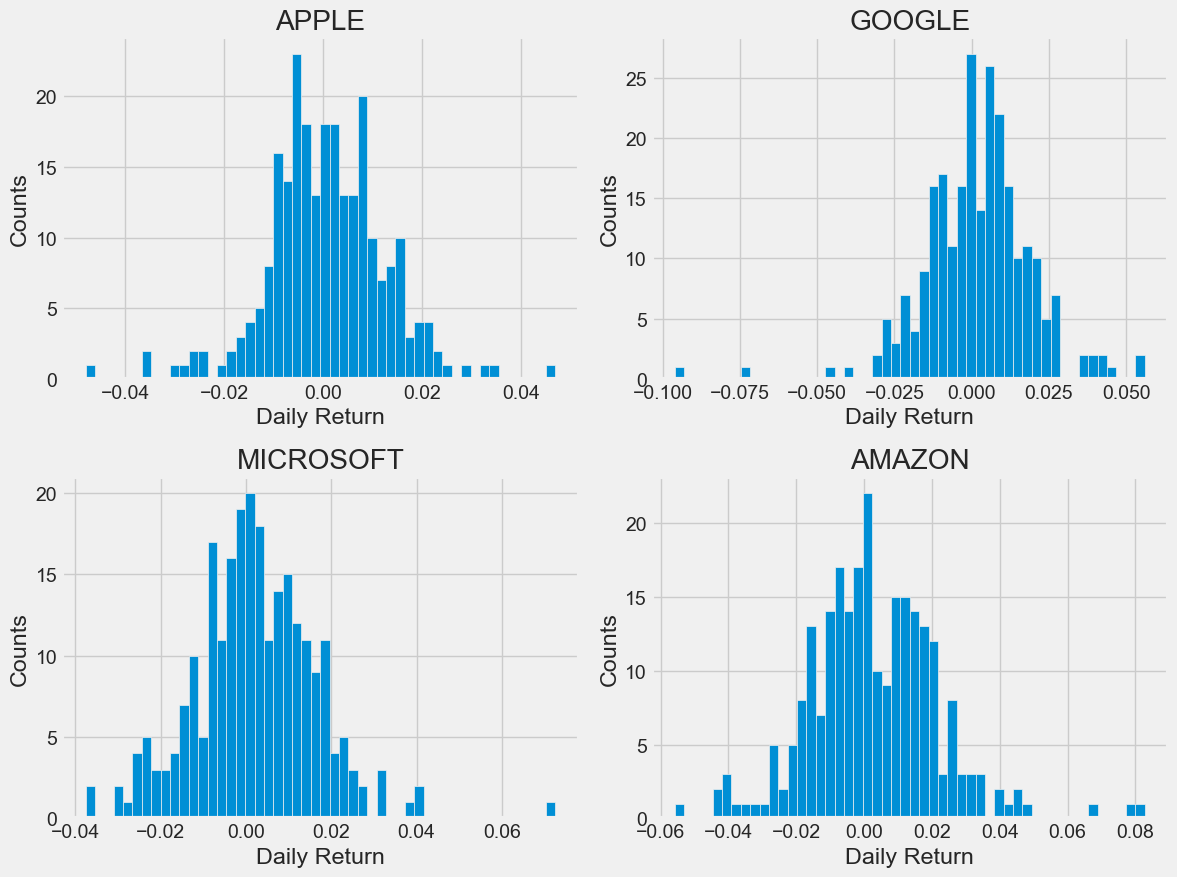

In [23]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()

## What was the correlation between different stocks closing prices?

In [24]:
closing_df = pdr.get_data_yahoo(tech_list, start=start,end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-13,NaN,NaN,NaN,NaN
2023-03-14,0.014089,0.026507,0.028257,0.027056
2023-03-15,0.002621,0.013912,0.024403,0.017830
2023-03-16,0.018694,0.039917,0.046815,0.040537
2023-03-17,-0.005454,-0.010896,0.013753,0.011694


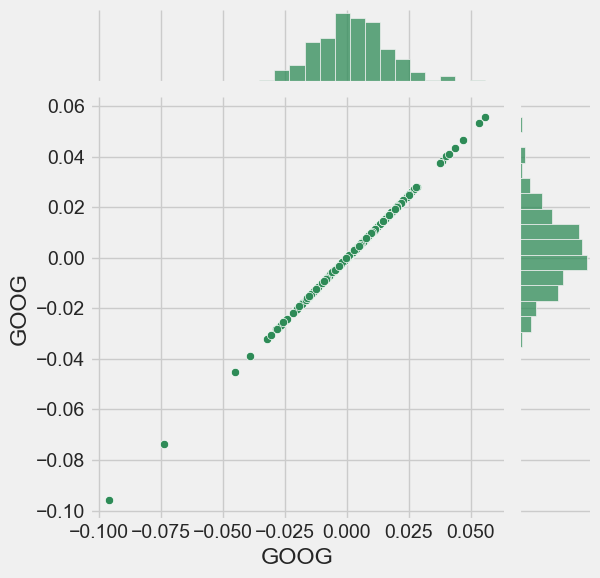

In [25]:
sns.jointplot(x='GOOG', y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

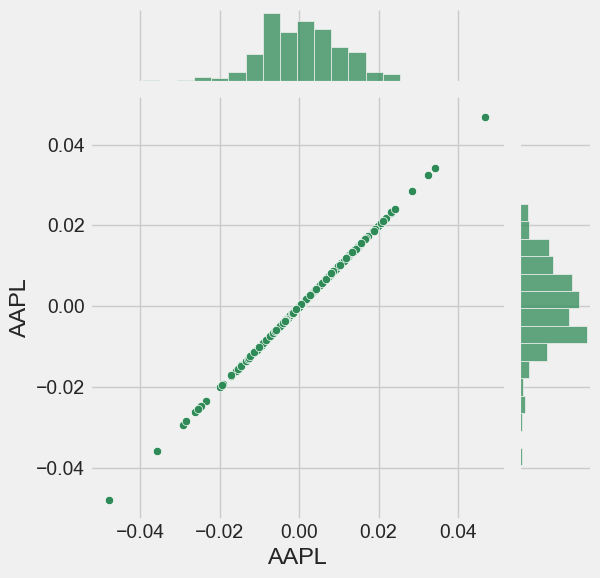

In [26]:
sns.jointplot(x='AAPL', y='AAPL',data=tech_rets,kind='scatter',color='seagreen')

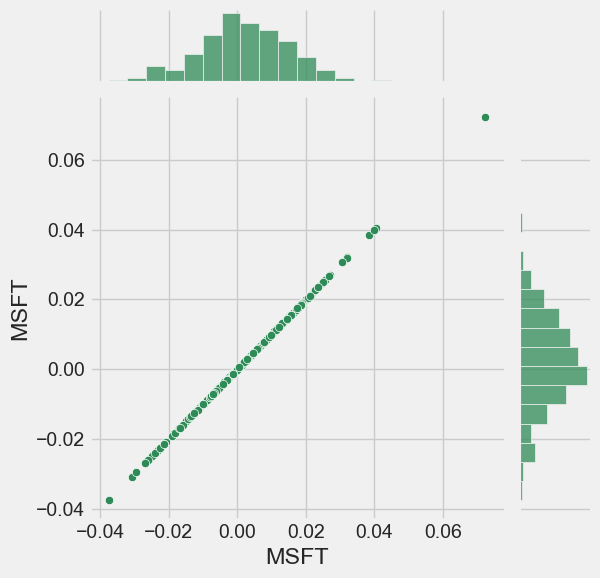

In [27]:
sns.jointplot(x='MSFT', y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

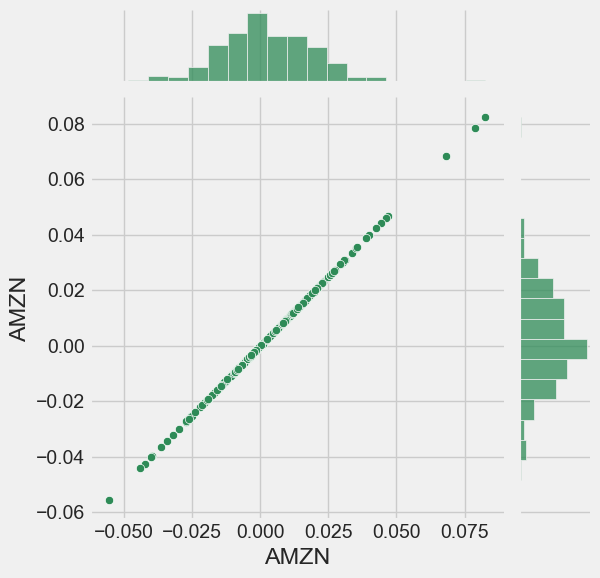

In [28]:
sns.jointplot(x='AMZN', y='AMZN',data=tech_rets,kind='scatter',color='seagreen')

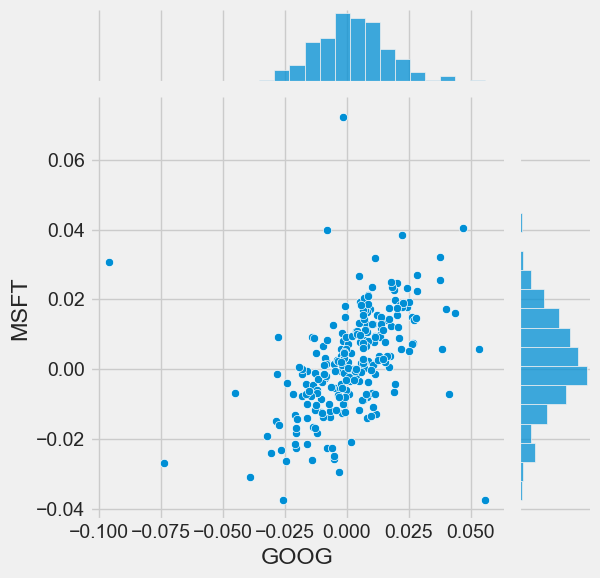

In [29]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

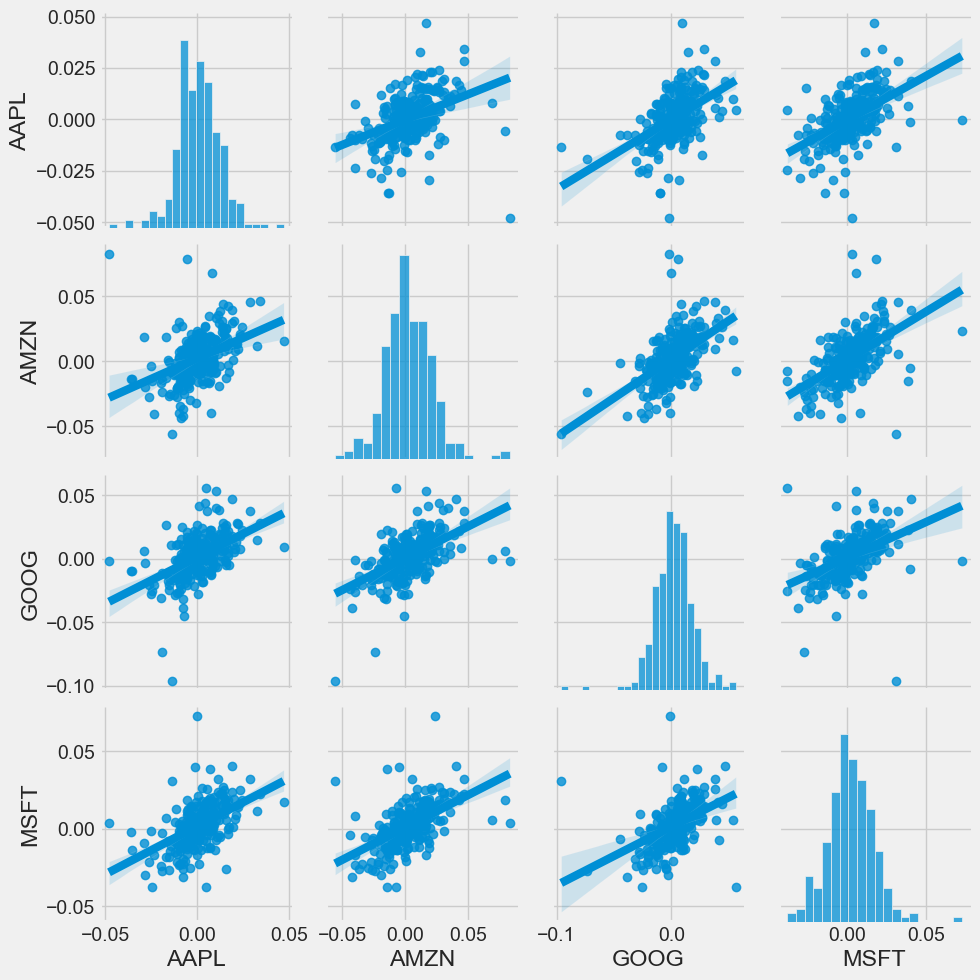

In [30]:
sns.pairplot(tech_rets,kind='reg')

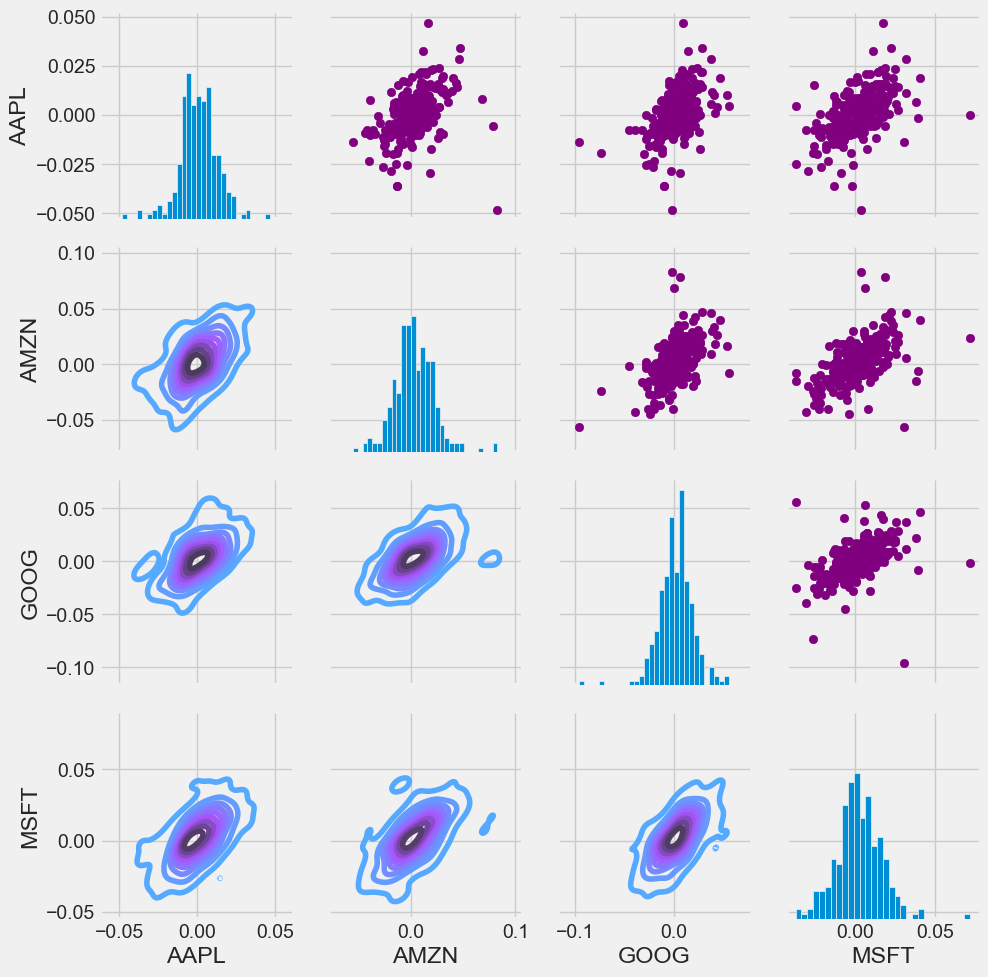

In [31]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

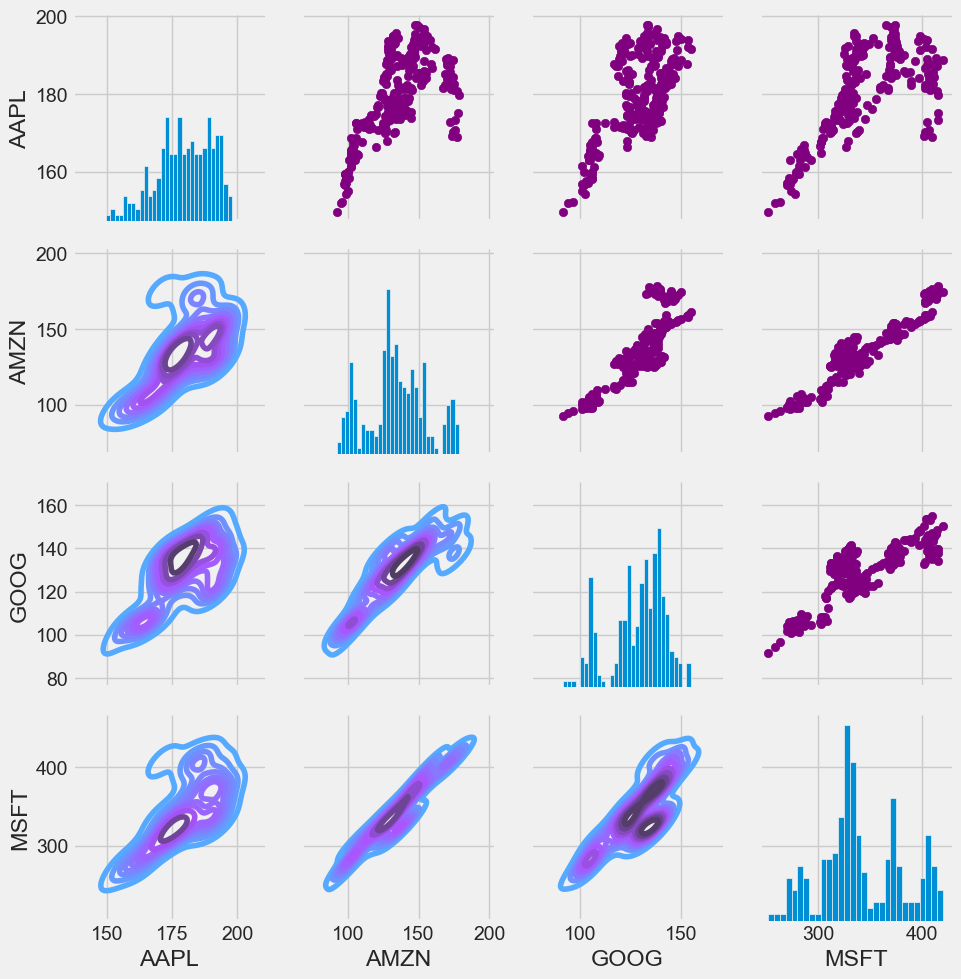

In [32]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

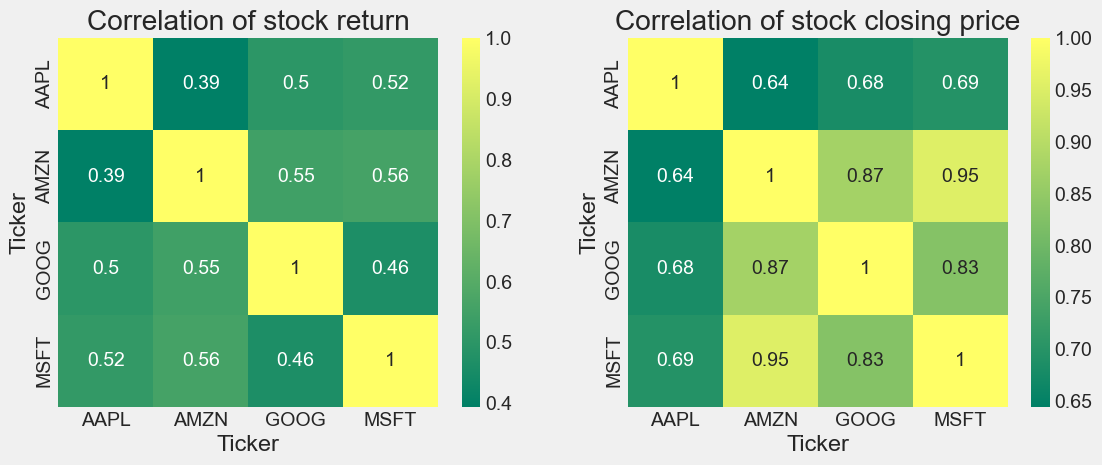

In [33]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## How much value do we put at risk by investing in a particular stock?

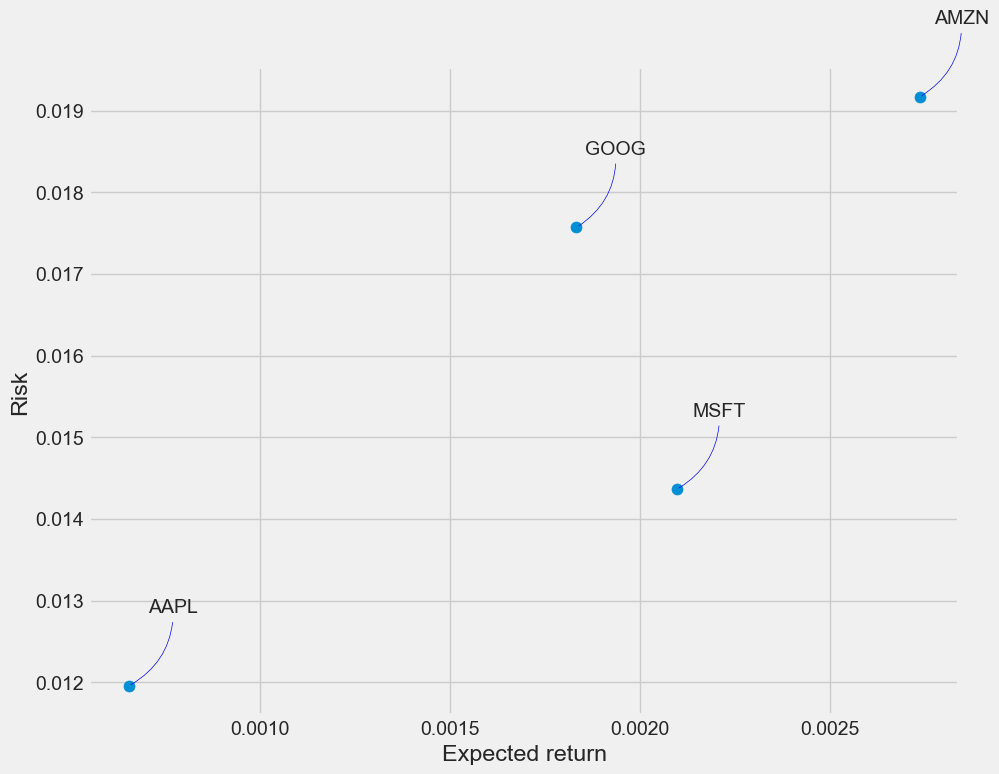

In [34]:
rets = tech_rets.dropna()

area = np.pi *20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right',va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3'))

## Predicting the closing price stock price of APPLE inc:

In [75]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01',end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433823,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500649,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771557,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600


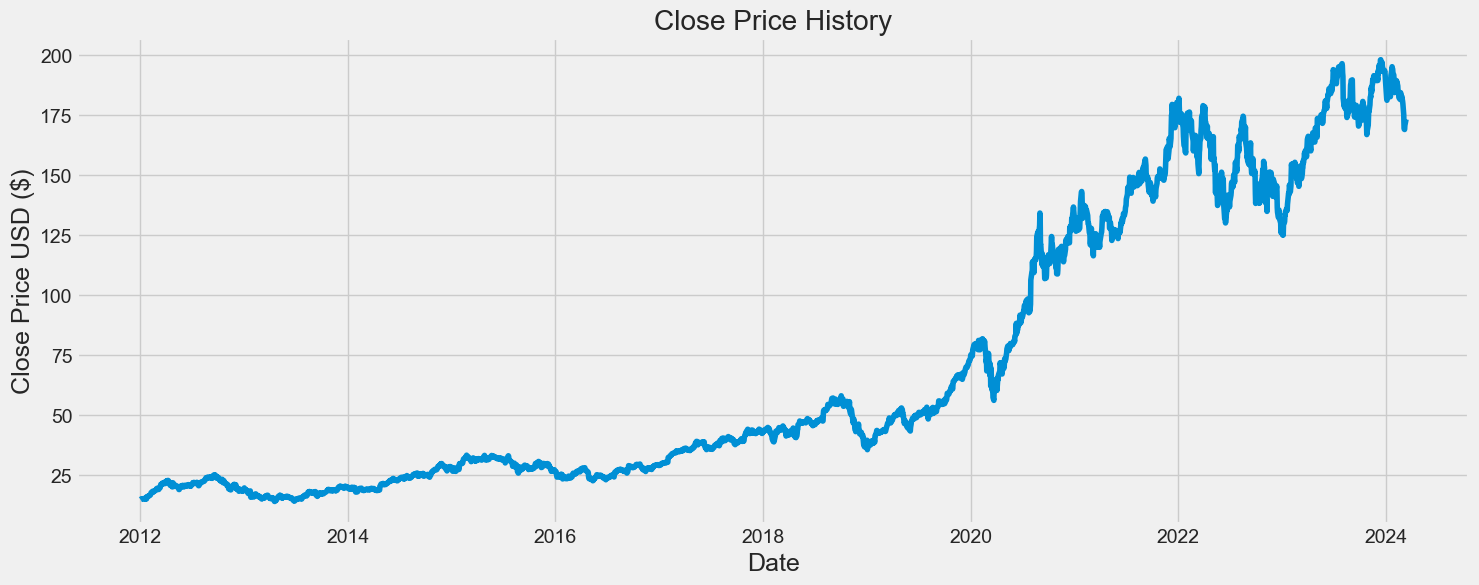

In [76]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [77]:
data =df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil(len(dataset)*.95))

training_data_len

2914

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.85132693],
       [0.86229552],
       [0.86490189]])

In [79]:
train_data = scaled_data[0:int(training_data_len)]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

x_train,y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [80]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2,output_size):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True)
        self.fc1 = nn.Linear(hidden_size2,25)
        self.fc2 = nn.Linear(25, output_size)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out[:,-1,:].unsqueeze(1))
        out = torch.relu(self.fc1(out[:,-1,:]))
        out = self.fc2(out)
        return out
    

In [81]:
x_train_torch = torch.tensor(x_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)

input_size = 1
hidden_size1 = 128
hidden_size2 = 64
output_size = 1
model = LSTMModel(input_size,hidden_size1,hidden_size2, output_size)

In [82]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [83]:
num_epochs = 30
for epoch in range(num_epochs):
    outputs = model(x_train_torch)
    loss = criterion(outputs, y_train_torch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

c:\Users\jsy11\anaconda3\envs\data\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2854])) that is different to the input size (torch.Size([2854, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/30], Loss: 0.2503
Epoch [2/30], Loss: 0.2407
Epoch [3/30], Loss: 0.2313
Epoch [4/30], Loss: 0.2220
Epoch [5/30], Loss: 0.2134
Epoch [6/30], Loss: 0.2049
Epoch [7/30], Loss: 0.1959
Epoch [8/30], Loss: 0.1863
Epoch [9/30], Loss: 0.1767
Epoch [10/30], Loss: 0.1668
Epoch [11/30], Loss: 0.1552
Epoch [12/30], Loss: 0.1411
Epoch [13/30], Loss: 0.1225
Epoch [14/30], Loss: 0.0968
Epoch [15/30], Loss: 0.0832
Epoch [16/30], Loss: 0.1031
Epoch [17/30], Loss: 0.1021
Epoch [18/30], Loss: 0.0915
Epoch [19/30], Loss: 0.0832
Epoch [20/30], Loss: 0.0819
Epoch [21/30], Loss: 0.0842
Epoch [22/30], Loss: 0.0866
Epoch [23/30], Loss: 0.0877
Epoch [24/30], Loss: 0.0876
Epoch [25/30], Loss: 0.0866
Epoch [26/30], Loss: 0.0851
Epoch [27/30], Loss: 0.0836
Epoch [28/30], Loss: 0.0823
Epoch [29/30], Loss: 0.0816
Epoch [30/30], Loss: 0.0815


In [84]:
# 예측값을 얻는 함수
def get_predictions(model, x_data):
    model.eval()  # 모델을 평가 모드로 설정
    with torch.no_grad():  # 그라디언트 계산 비활성화
        predictions = model(x_data)  # 예측 수행
    return predictions

# 예측값의 RMSE 계산 함수
def calculate_rmse(predictions, targets):
    rmse = torch.sqrt(torch.mean((predictions - targets)**2)).item()  # RMSE 계산
    return rmse

# 모델 테스트
predictions = get_predictions(model, x_train_torch)  # 훈련 데이터에 대한 예측 수행
rmse = calculate_rmse(predictions, y_train_torch)  # RMSE 계산
print("RMSE:", rmse)


RMSE: 0.2862204313278198


C:\Users\jsy11\AppData\Local\Temp\ipykernel_30088\4162290310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


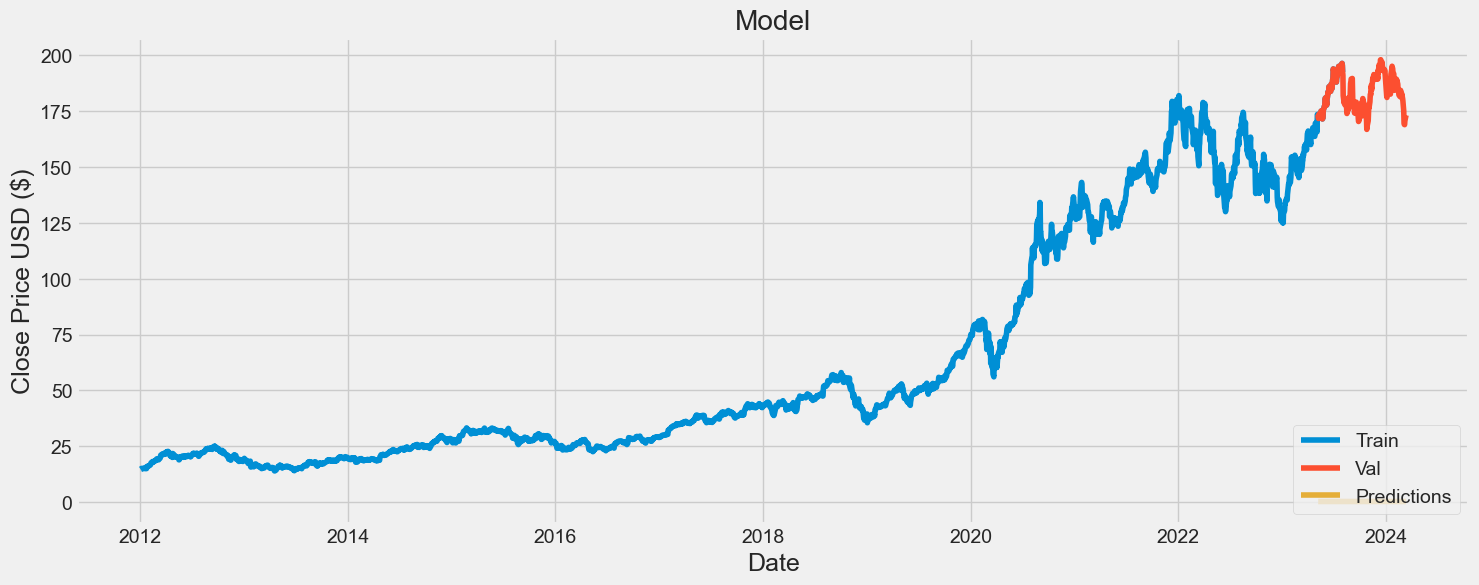

In [85]:
# train, valid 데이터프레임 재구성
train = data[:training_data_len]  # training_data_len만큼의 데이터 선택
valid = data[training_data_len - 60:]  # training_data_len - 60부터의 데이터 선택 (예측에 사용된 마지막 60일 제외)

# predictions 길이 조정
predictions = predictions[:len(valid)]

# valid 데이터프레임에 'Predictions' 열 추가
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [86]:
valid

,Close,Predictions
Date,,
2023-05-08,173.500000,0.289495
2023-05-09,171.770004,0.289512
2023-05-10,173.559998,0.289514
2023-05-11,173.750000,0.289542
2023-05-12,172.570007,0.289576
...,...,...
2024-03-06,169.119995,0.288659
2024-03-07,169.000000,0.288629
2024-03-08,170.729996,0.288601


# 직접

## 볼린저 밴드

In [65]:
# 주식 데이터에 볼린저 밴드 
def calculate_bollinger_bands(data, window=20):
    data['MA20'] = data['Close'].rolling(window).mean()  # 중심선
    data['Upper'] = data['MA20'] + 2 * data['Close'].rolling(window).std()  # 상단 밴드
    data['Lower'] = data['MA20'] - 2 * data['Close'].rolling(window).std()  # 하단 밴드
    return data

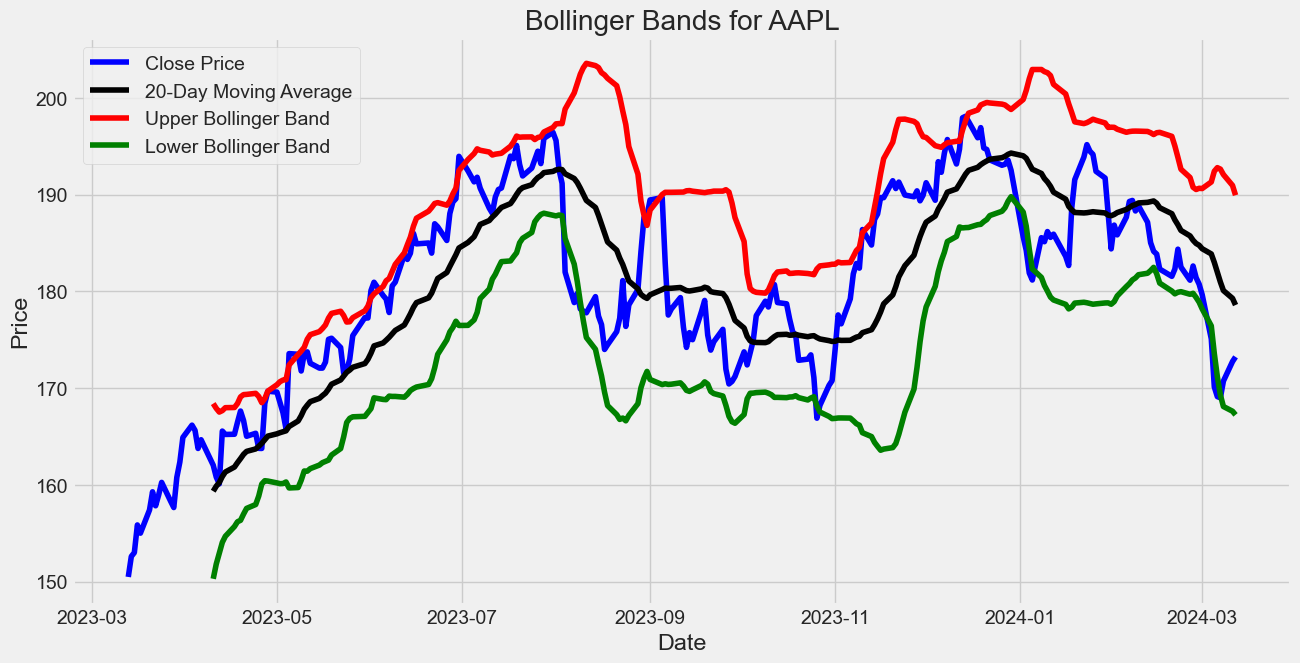

In [66]:
# 볼린저 밴드 계산
AAPL = calculate_bollinger_bands(AAPL)

# 볼린저 밴드 시각화
plt.figure(figsize=(14,7))
plt.plot(AAPL['Close'], label='Close Price', color='blue')
plt.plot(AAPL['MA20'], label='20-Day Moving Average', color='black')
plt.plot(AAPL['Upper'], label='Upper Bollinger Band', color='red')
plt.plot(AAPL['Lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

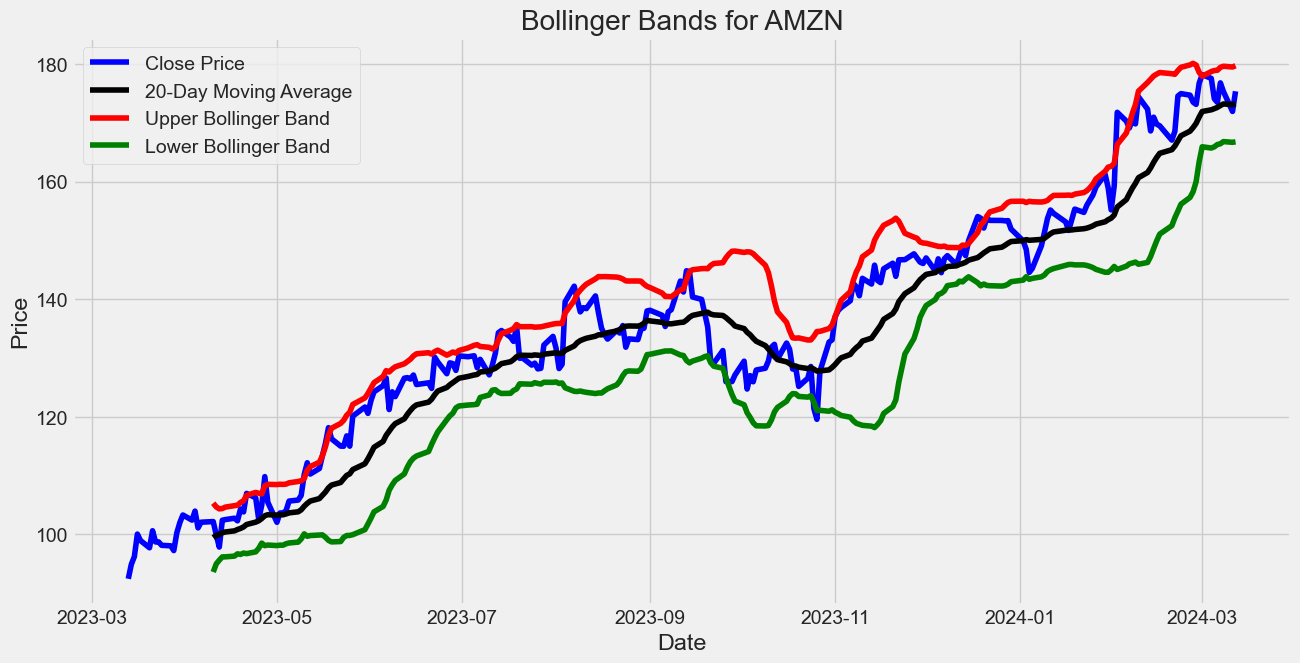

In [67]:
# 볼린저 밴드 계산
AMZN = calculate_bollinger_bands(AMZN)

# 볼린저 밴드 시각화
plt.figure(figsize=(14,7))
plt.plot(AMZN['Close'], label='Close Price', color='blue')
plt.plot(AMZN['MA20'], label='20-Day Moving Average', color='black')
plt.plot(AMZN['Upper'], label='Upper Bollinger Band', color='red')
plt.plot(AMZN['Lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for AMZN')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

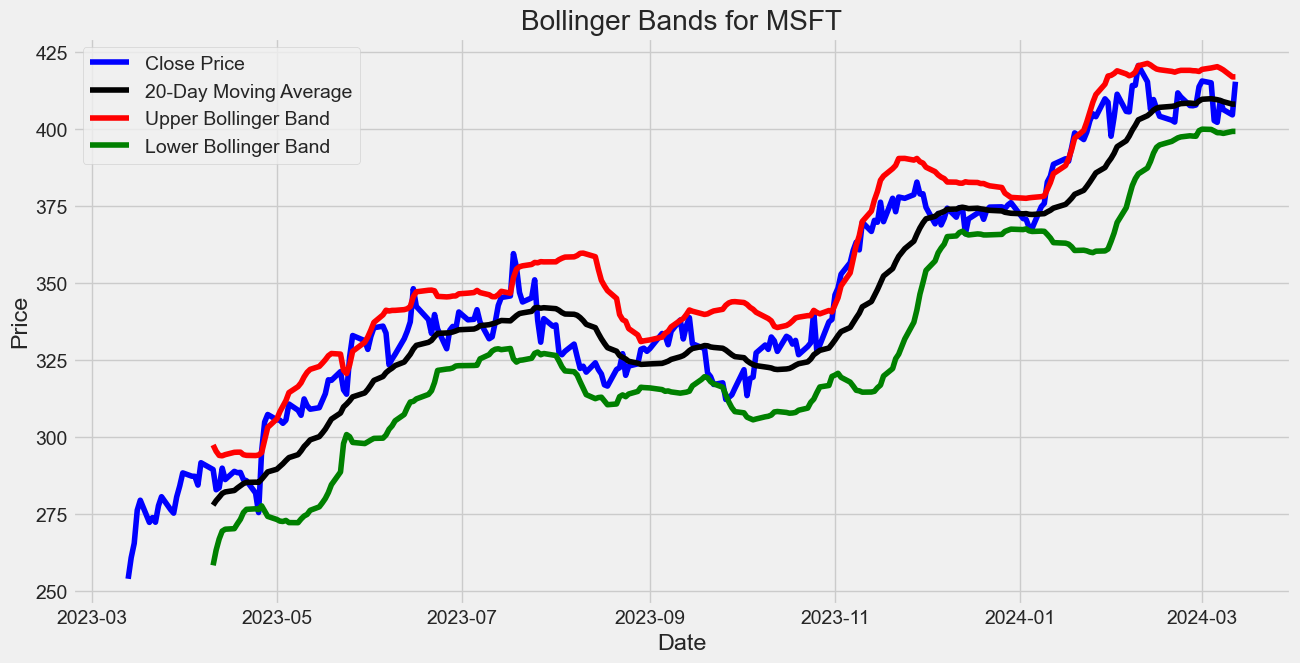

In [68]:
# 볼린저 밴드 계산
MSFT = calculate_bollinger_bands(MSFT)

# 볼린저 밴드 시각화
plt.figure(figsize=(14,7))
plt.plot(MSFT['Close'], label='Close Price', color='blue')
plt.plot(MSFT['MA20'], label='20-Day Moving Average', color='black')
plt.plot(MSFT['Upper'], label='Upper Bollinger Band', color='red')
plt.plot(MSFT['Lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for MSFT')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

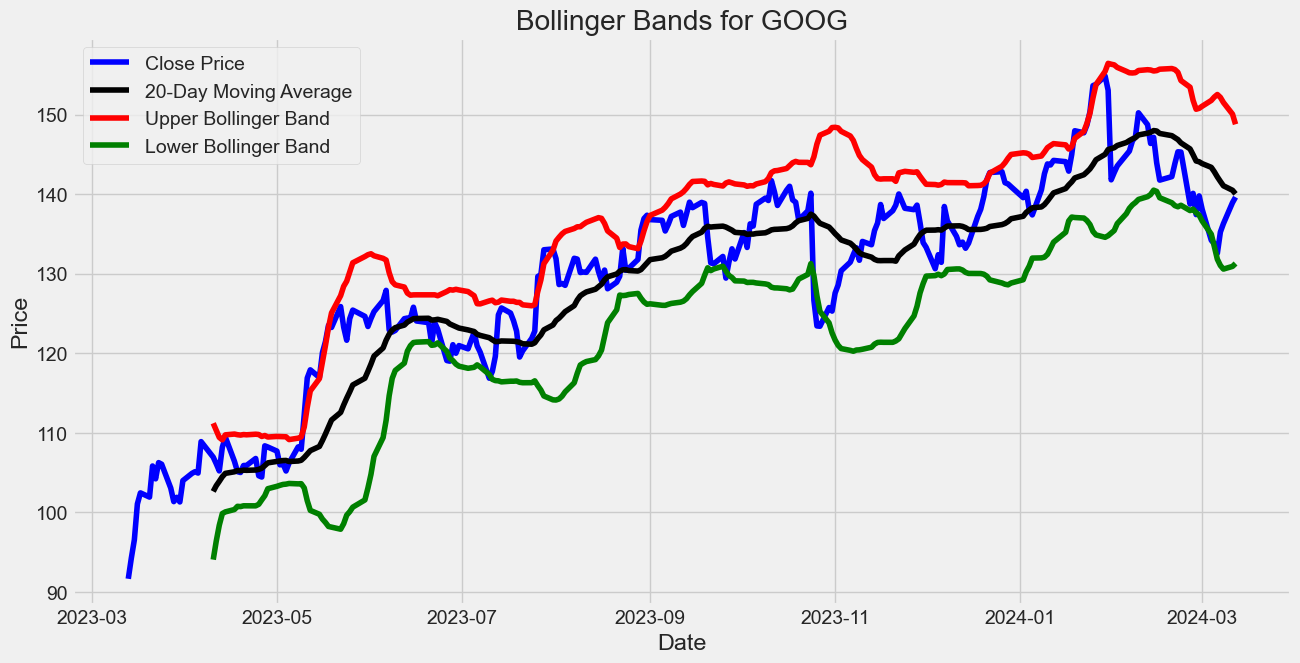

In [69]:
# 볼린저 밴드 계산
GOOG = calculate_bollinger_bands(GOOG)

# 볼린저 밴드 시각화
plt.figure(figsize=(14,7))
plt.plot(GOOG['Close'], label='Close Price', color='blue')
plt.plot(GOOG['MA20'], label='20-Day Moving Average', color='black')
plt.plot(GOOG['Upper'], label='Upper Bollinger Band', color='red')
plt.plot(GOOG['Lower'], label='Lower Bollinger Band', color='green')
plt.title('Bollinger Bands for GOOG')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 데이터 히스토그램

<Figure size 2000x1200 with 0 Axes>

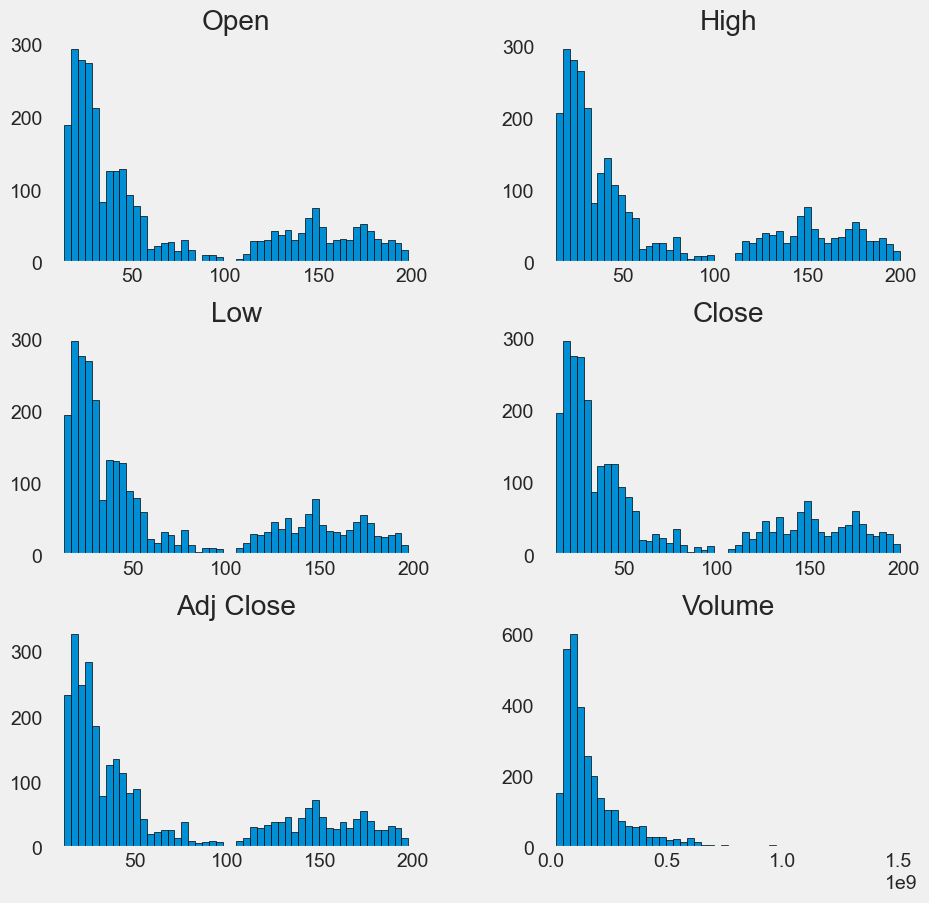

In [70]:
# 전체
plt.figure(figsize=(20,12))
df.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
fig.tight_layout()

<Figure size 2000x1200 with 0 Axes>

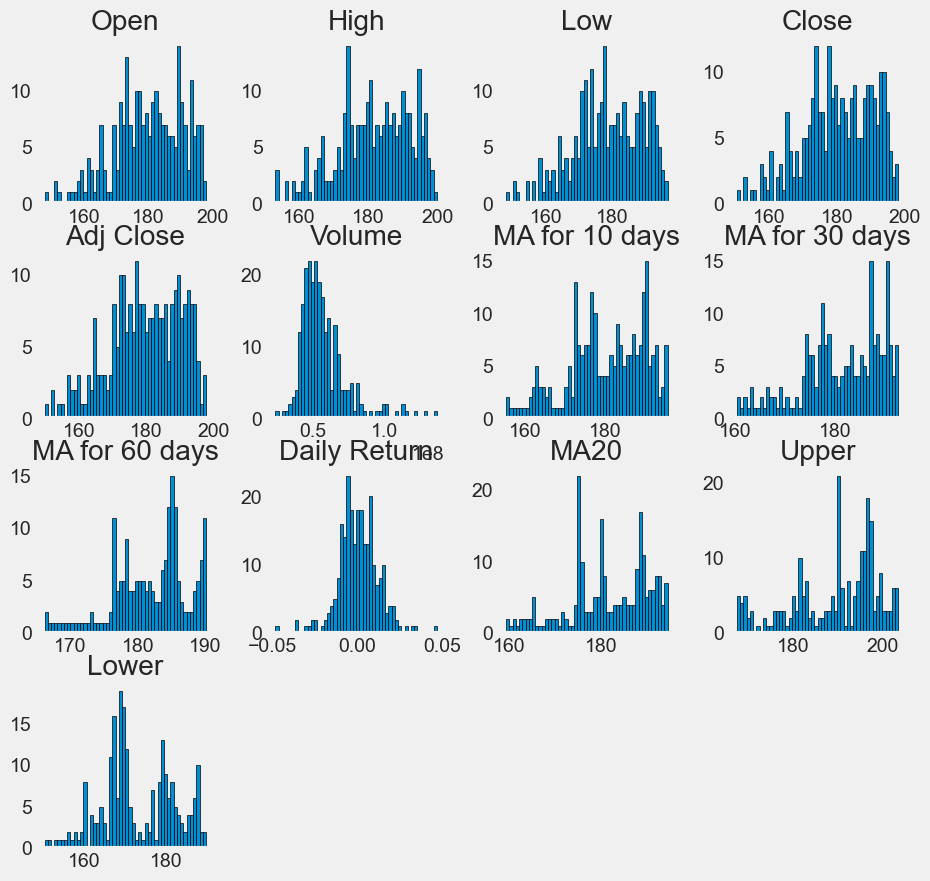

In [71]:
# 애플
plt.figure(figsize=(20,12))
AAPL.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
plt.show()

<Figure size 2000x1200 with 0 Axes>

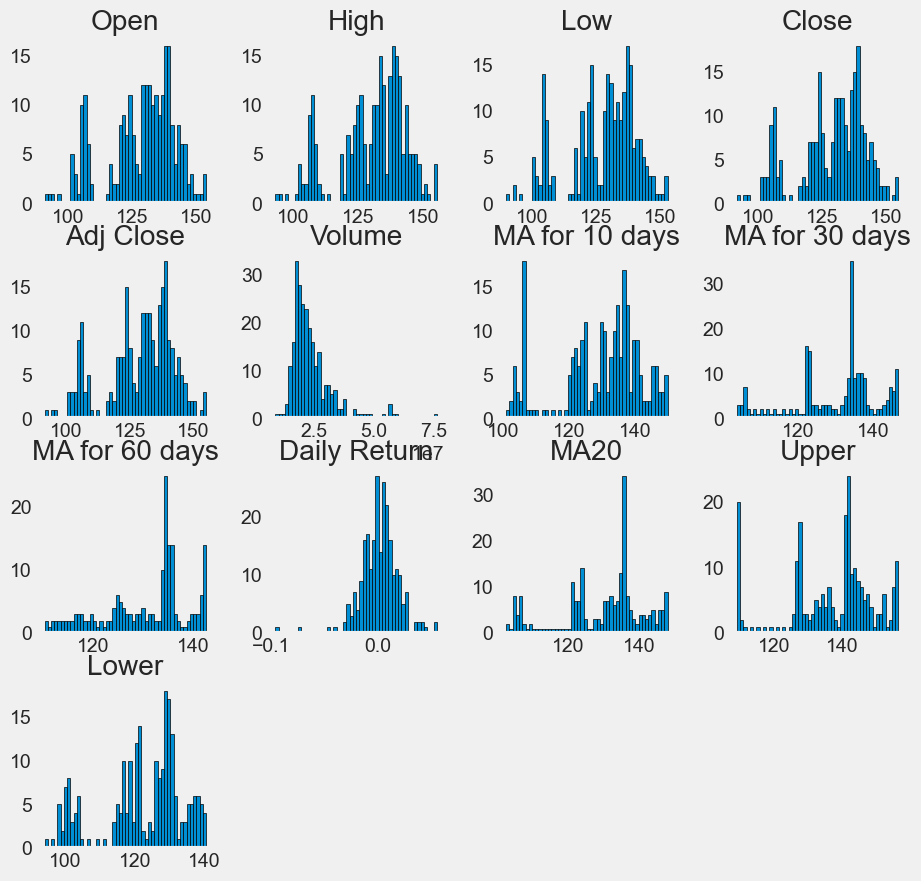

In [72]:
# 구글
plt.figure(figsize=(20,12))
GOOG.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
plt.show()

<Figure size 2000x1200 with 0 Axes>

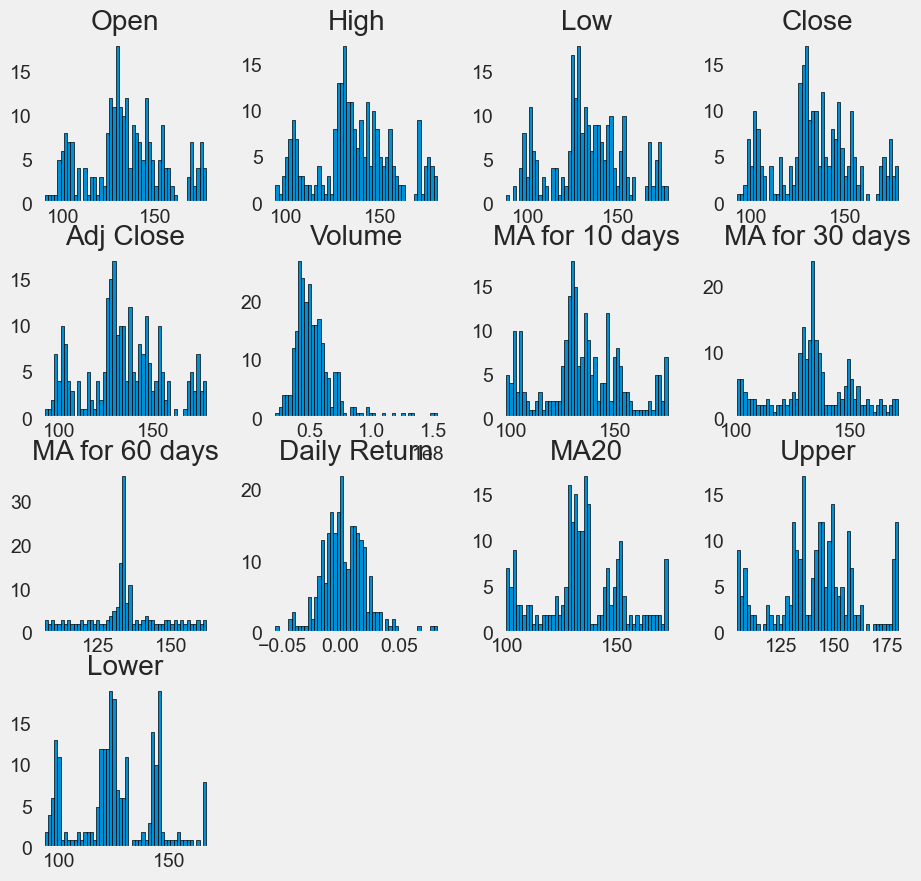

In [73]:
# 아마존
plt.figure(figsize=(20,12))
AMZN.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
plt.show()

<Figure size 2000x1200 with 0 Axes>

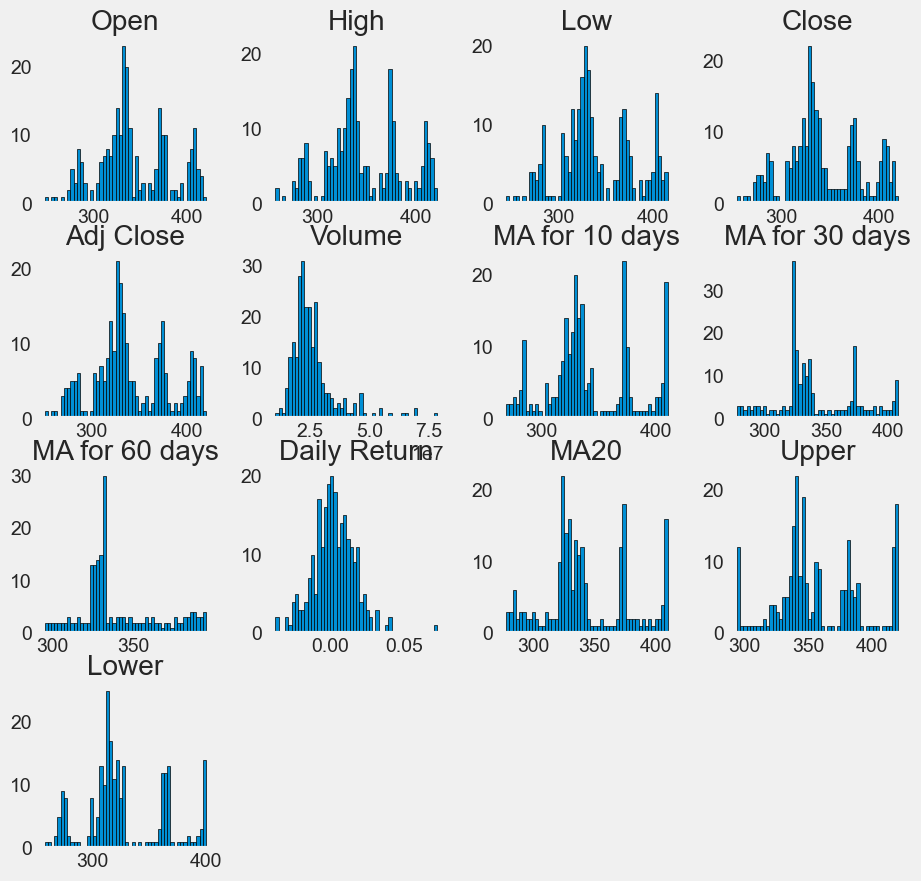

In [74]:
# 마이크로소프트
plt.figure(figsize=(20,12))
MSFT.hist(figsize=(10, 10), bins=50, edgecolor='black', grid=False)
plt.show()

## 백테스팅